In [1]:
# imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import colormaps as cmaps # for scientific colourmaps

from scipy.interpolate import griddata

* Creates a contour plot for two medium components and a desired performance indicator from the MOBO results.
* The x-axis is given by var_1, the y-axis by var_2, the contour is given by var_Z.
* If passed, the results of where BayesianOpt asmpled are plotted on top of the contour.
* results_BO can be the same dataset as results or a different one.
* Saves the figure as png file named *figname + "_" + var_1 + "_" + var_2 + "_" + var_Z +".png"*


In [2]:
data = pd.read_csv("Figure2C.csv")

EX_pi_e  vs  EX_cobalt2_e


C:\Users\Nicola\AppData\Local\Temp\ipykernel_28940\3687556029.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes.legend()


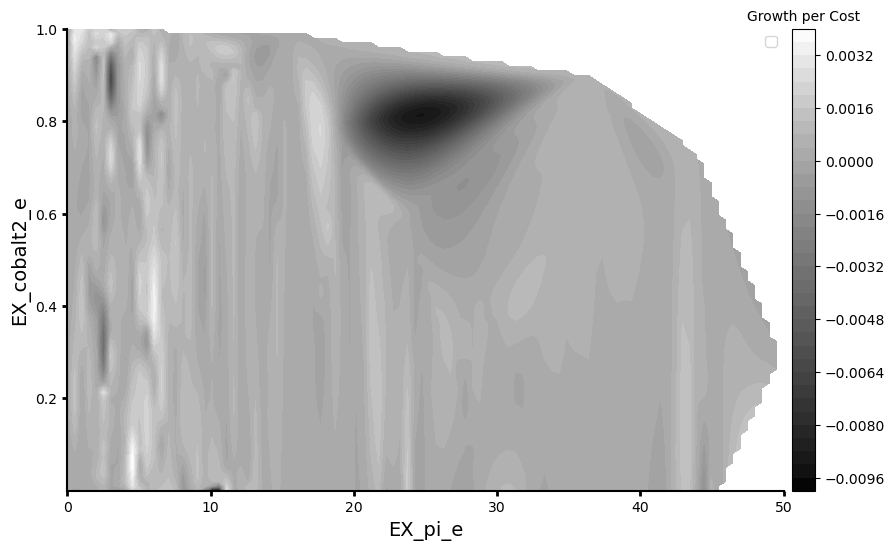

EX_pi_e  vs  EX_cu2_e


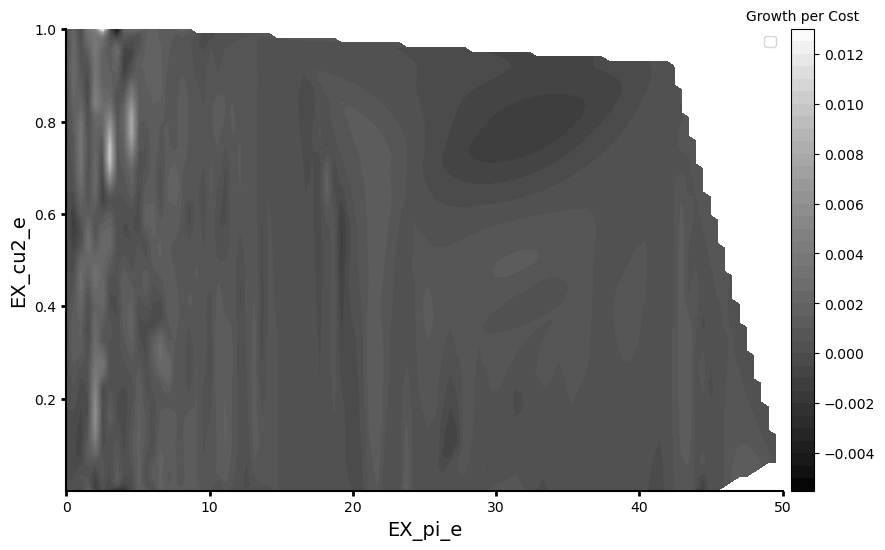

EX_pi_e  vs  EX_glc__D_e


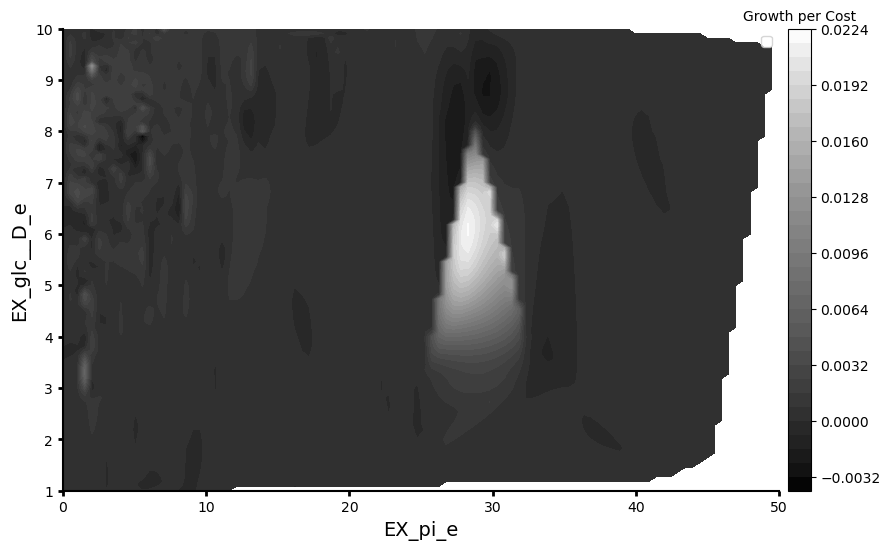

EX_pi_e  vs  EX_ni2_e


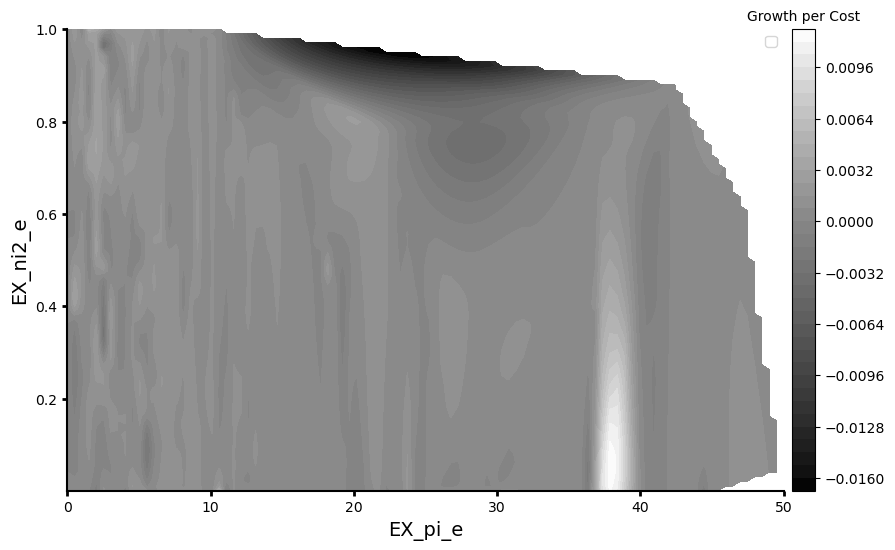

EX_ca2_e  vs  EX_nh4_e


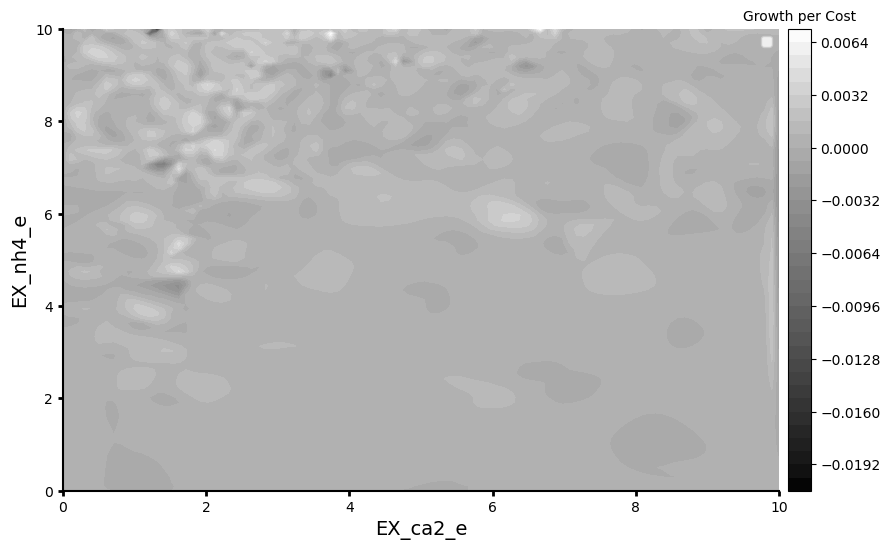

EX_ca2_e  vs  EX_so4_e


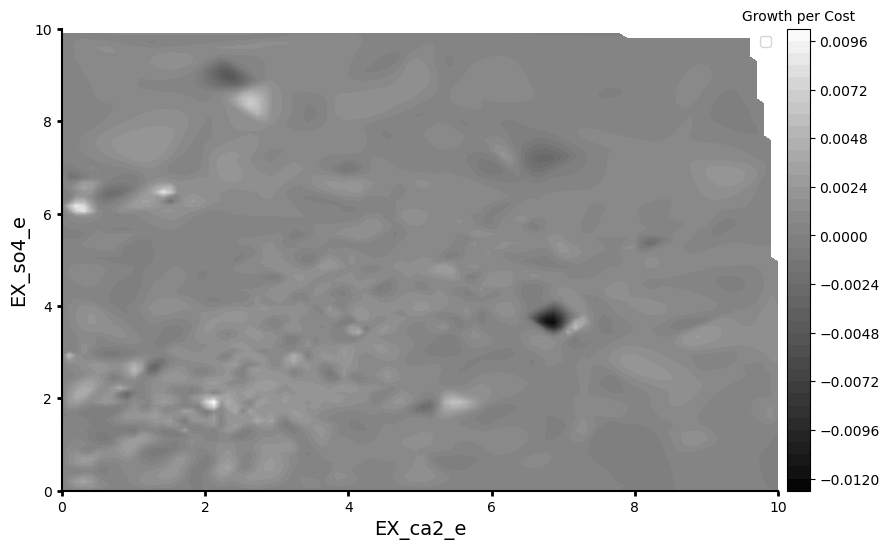

In [ ]:
"""LOOP over surfaces identified as interesting without datapoints"""
levels = 40
var_1_list = ["EX_pi_e", "EX_ca2_e"]
var_2_list = [["EX_cobalt2_e", "EX_cu2_e", "EX_glc__D_e", "EX_ni2_e"], 
              ["EX_nh4_e", "EX_so4_e"]]

for i in range(len(var_1_list)):
    var_1 = var_1_list[i]
    for j in range(len(var_2_list[i])):
        var_2 = var_2_list[i][j]
        print(var_1, " vs ", var_2)

        # extract chosen medium components as X and Y
        X = data[var_1]
        Y = data[var_2]
        # Z (the contour) is Growth per Cost or Cost or Growth
        Z = data["growth_per_cost"]


        # Create a grid of X and Y values
        xi = np.linspace(X.min(), X.max(), 100)
        yi = np.linspace(Y.min(), Y.max(), 100)
        # Interpolate Z values onto the grid (cubic)
        zi = griddata((X, Y), Z, (xi[None, :], yi[:, None]), method = "cubic")
        # alternative interpolations to try:
        #zi = griddata((X, Y), Z, (xi[None, :], yi[:, None]), method = "linear") # resulted in many white areas in plots
        #zi = griddata((X, Y), Z, (xi[None, :], yi[:, None]), method = "nearest") # likely to not work

        # Create figure and axis
        fig, axes = plt.subplots(figsize = (11, 6))
        # Plot the contour
        contour = axes.contourf(xi, yi, zi, levels = levels, cmap = cmaps.grayc)

        cbar = fig.colorbar(contour, pad = 0.01)
        cbar.ax.set_title("Growth per Cost", fontsize = 10)
        cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks


        # axes
        axes.set_xlabel(var_1, fontsize = 14)
        axes.set_ylabel(var_2, fontsize = 14)
        axes.xaxis.set_tick_params(width = 2, labelsize = 10)
        axes.yaxis.set_tick_params(width = 2, labelsize = 10)
        axes.spines["top"].set_visible(False)
        axes.spines["right"].set_visible(False)
        axes.spines["bottom"].set_linewidth(1.5)
        axes.spines["left"].set_linewidth(1.5)

        # Display the legend
        axes.legend()
            
        # Show the plot
        plt.show()

        fig.set_size_inches(9, 7)  # Consistent physical size in inches
        fig.savefig("Figure2C_" + var_1 + "_vs_" + var_2 + ".png", dpi = 300, bbox_inches = None)
        plt.close(fig)

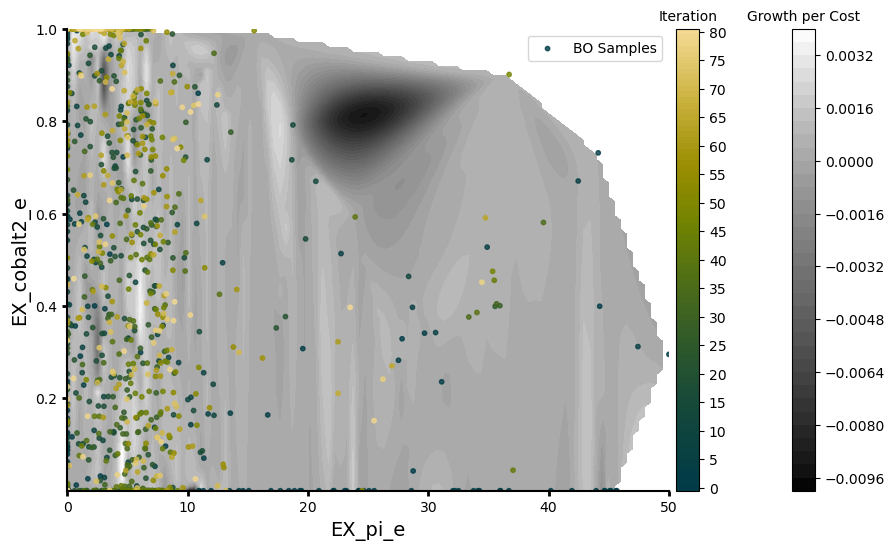

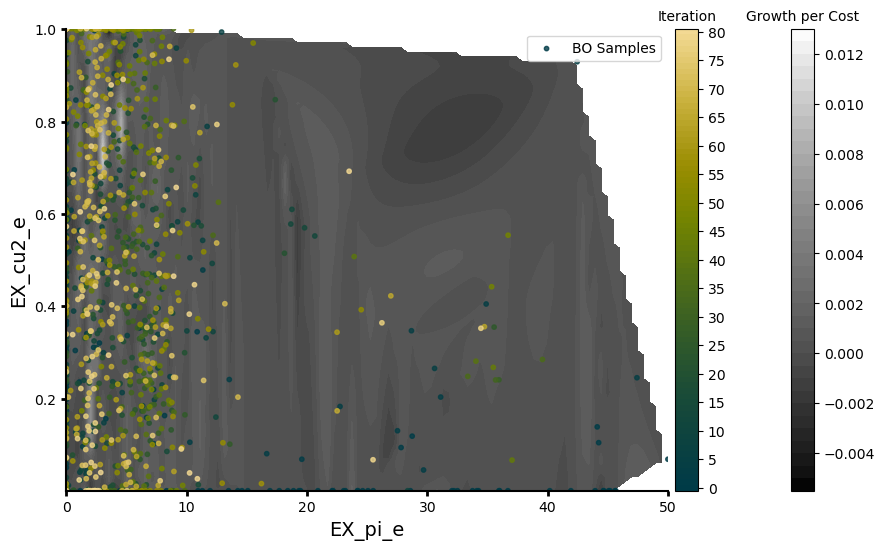

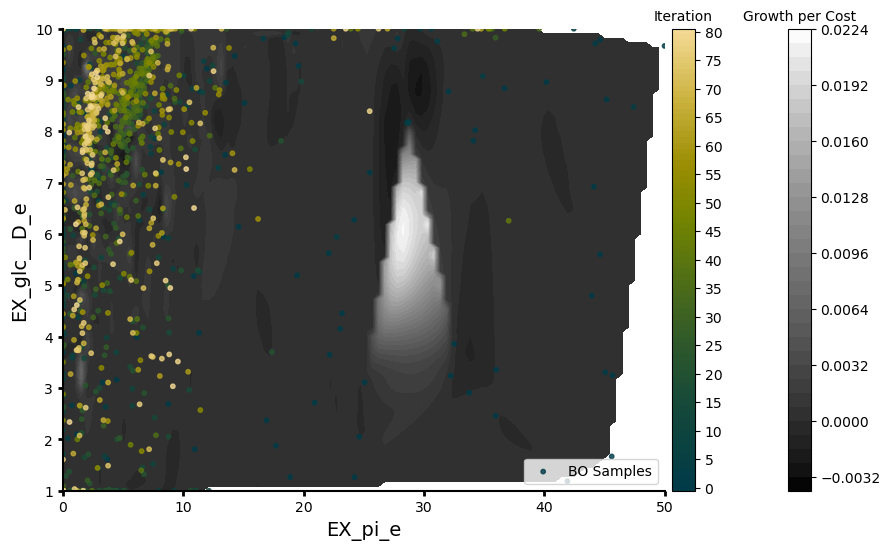

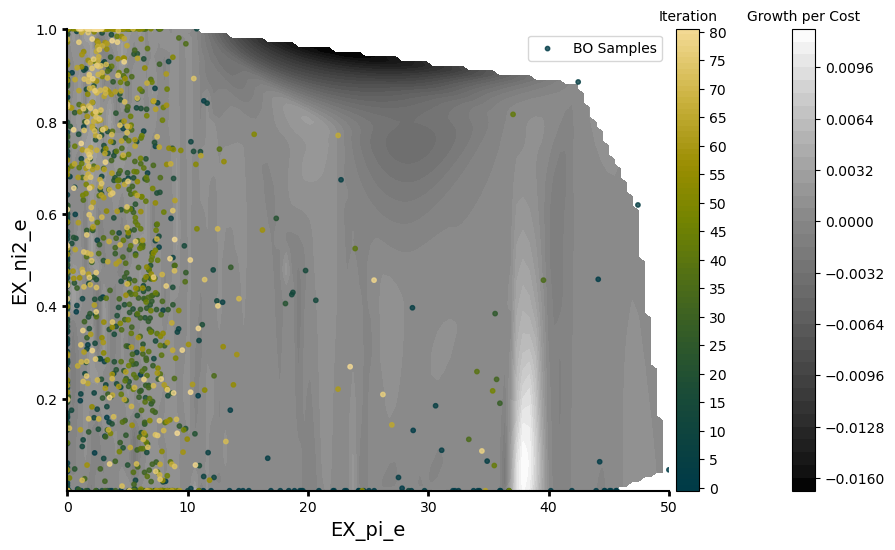

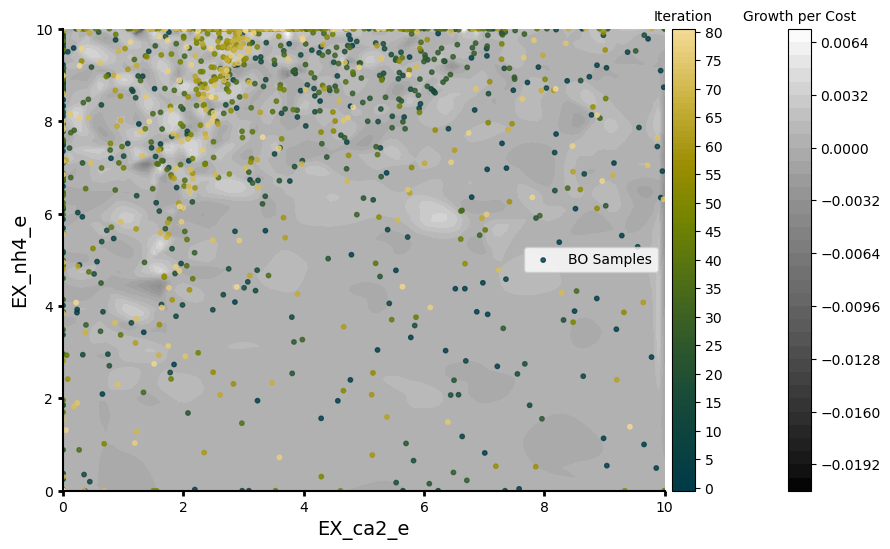

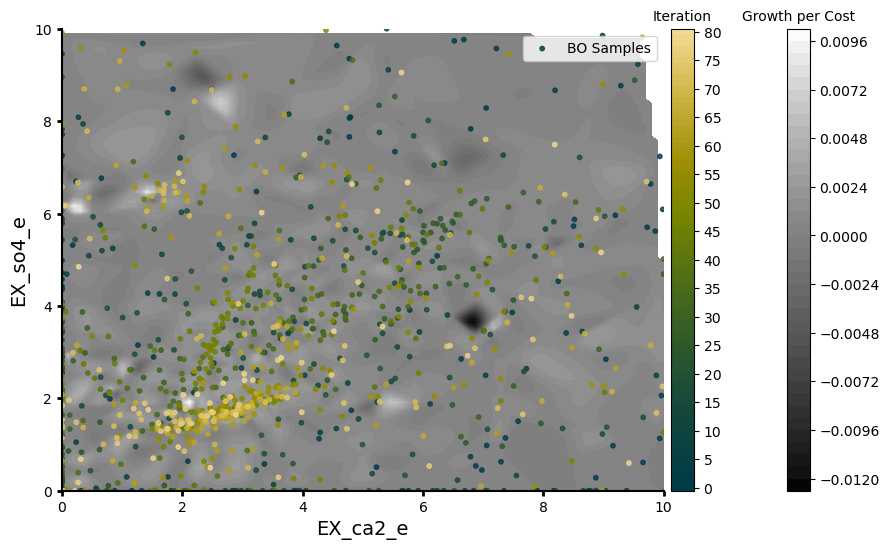

In [27]:
"""LOOP over surfaces identified as interesting with datapoints"""
levels = 40
var_1_list = ["EX_pi_e", "EX_ca2_e"]
var_2_list = [["EX_cobalt2_e", "EX_cu2_e", "EX_glc__D_e", "EX_ni2_e"], 
              ["EX_nh4_e", "EX_so4_e"]]

for i in range(len(var_1_list)):
    var_1 = var_1_list[i]
    
    for j in range(len(var_2_list[i])):
        var_2 = var_2_list[i][j]

        # extract chosen medium components as X and Y
        X = data[var_1]
        Y = data[var_2]
        # Z (the contour) is Growth per Cost or Cost or Growth
        Z = data["growth_per_cost"]


        # Create a grid of X and Y values
        xi = np.linspace(X.min(), X.max(), 100)
        yi = np.linspace(Y.min(), Y.max(), 100)
        # Interpolate Z values onto the grid (linearly)
        zi = griddata((X, Y), Z, (xi[None, :], yi[:, None]), method = "cubic")

        # Create figure and axis
        fig, axes = plt.subplots(figsize = (11, 6))
        # Plot the contour
        contour = axes.contourf(xi, yi, zi, levels = levels, cmap = cmaps.grayc)

        cbar = fig.colorbar(contour, pad = 0.01)
        cbar.ax.set_title("Growth per Cost", fontsize = 10)
        cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks


        """
        INSERT PLOTTING THE DATA POINTS
        """
        # Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
        n_start = data["n_start"][0]
        n_batch = data["n_batch"][0]
        n_candidates = data["n_candidates"][0]

        # Generate distinct colours
        colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, n_batch + 1))
        # Create a custom colourmap for the colour bar
        cmap = mcolors.ListedColormap(colours)

        # Create an array to store colours for each data point
        point_colours = np.zeros(len(data), dtype = object)

        # Assign first n_start points the same colour
        point_colours[:n_start] = [colours[0]] * n_start
        # Assign different colours to each batch
        for k in range(n_batch):
            start_idx = n_start + k * n_candidates
            end_idx = start_idx + n_candidates
            point_colours[start_idx:end_idx] = [colours[k + 1]] * (end_idx - start_idx) # Assign a new color per batch

        # Set boundaries between each batch, from -0.5 to n_batch + 0.5
        boundaries = np.arange(n_batch + 2) - 0.5
        norm = mcolors.BoundaryNorm(boundaries, cmap.N)

        sc = axes.scatter(
            x = data[var_1], y = data[var_2], 
            c = point_colours, alpha = 0.8, s = 10, label = "BO Samples"
        )

         # Add the color bar & define ticks
        tick_positions_BO = np.arange(0, n_batch + 1, 5)
        sm = cm.ScalarMappable(cmap = cmap, norm = norm)
        cbar_BO = fig.colorbar(sm, ax = axes,
                               ticks = tick_positions_BO, pad = 0.01)
        cbar_BO.ax.set_title("Iteration", fontsize = 10)
        cbar_BO.ax.tick_params(which = 'minor', size = 0) # turn off minor ticks at colour boundaries       


        # axes
        axes.set_xlabel(var_1, fontsize = 14)
        axes.set_ylabel(var_2, fontsize = 14)
        axes.xaxis.set_tick_params(width = 2, labelsize = 10)
        axes.yaxis.set_tick_params(width = 2, labelsize = 10)
        axes.spines["top"].set_visible(False)
        axes.spines["right"].set_visible(False)
        axes.spines["bottom"].set_linewidth(1.5)
        axes.spines["left"].set_linewidth(1.5)

        # Display the legend
        axes.legend()
            
        # Show the plot
        plt.show()

        fig.set_size_inches(9, 7)  # Consistent physical size in inches
        fig.savefig(
            "Figure2C_" + var_1 + "_vs_" + var_2 + "_sampled.png", 
            dpi = 300, bbox_inches = None)
        plt.close(fig)

In [ ]:
"""LOOP to see all surfaces"""
levels = 40
components = (list(data))[:-6]
n_components = len(components)
for i in range(n_components):
    for j in range(i):
        var_1 = components[i]
        var_2 = components[j]

        # extract chosen medium components as X and Y
        X = data[var_1]
        Y = data[var_2]
        # Z (the contour) is Growth per Cost or Cost or Growth
        Z = data["growth_per_cost"]

        # Create a grid of X and Y values
        xi = np.linspace(X.min(), X.max(), 100)
        yi = np.linspace(Y.min(), Y.max(), 100)
        # Interpolate Z values onto the grid (linearly)
        zi = griddata((X, Y), Z, (xi[None, :], yi[:, None]), method = "cubic")

        # Create figure and axis
        fig, axes = plt.subplots(figsize = (11, 6))
        # Plot the contour
        contour = axes.contourf(xi, yi, zi, levels = levels, cmap = cmaps.acton)

        cbar = fig.colorbar(contour, pad = 0.01)
        cbar.ax.set_title("Growth per Cost", fontsize = 10)
        cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks

        # axes
        axes.set_xlabel(var_1, fontsize = 14)
        axes.set_ylabel(var_2, fontsize = 14)
        axes.xaxis.set_tick_params(width = 2, labelsize = 10)
        axes.yaxis.set_tick_params(width = 2, labelsize = 10)
        axes.spines["top"].set_visible(False)
        axes.spines["right"].set_visible(False)
        axes.spines["bottom"].set_linewidth(1.5)
        axes.spines["left"].set_linewidth(1.5)

        # Display the legend
        axes.legend()
            
        # Show the plot
        #plt.show()

        fig.set_size_inches(9, 7)  # Consistent physical size in inches
        figname = "Figure2C_" + components[i] + "_" + components[j] + ".png"
        fig.savefig(figname, dpi = 300, bbox_inches = None)
        plt.close(fig)